Choosing _eps_ and *minPts* parameters for DBSCAN
=================================

DBSCAN requires two parameters, _eps_ and _min_pts_

Some ideas to explore
--------------------------
1. *Knee* selection algorithm
2. OPTICS algorithm
3. BDE-DBSCAN

The idea behind *'knee'* selection process:
----------------------------------
1. We look at the distance from each point to its $k^{th}$ nearest neighbour. We will call this distance $\mid k\mid$.
2. By calculating $\mid k\mid$ of a selected $k$ value and then sorting the values in increasing values of $\mid k\mid$ we can find an appropriate value for _eps_ by finding the value of $\mid k\mid$ where $f''(|k|) = 0$

Source: *"Selection of DBSCAN Parameters"*, http://www-users.cs.umn.edu/~kumar/dmbook/ch8.pdf

The idea behind OPTICS algorithm:
------------------------------------
**OPTICS** stands for *Ordering Points To Identify Clustering Structure*

*TODO*

The idea behind BDE-DBSCAN
--------------------------
Using Differential Evolutionary algorithm to determine *eps* and *minPts* value using a cluster purity function to determine the *fitness* of a cluster in a population

Purity function: http://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html#eqn:purity

BDE-DBSCAN: http://research.ijcaonline.org/volume91/number7/pxc3895059.pdf

In [7]:
import pandas as pd
import numpy as np
import helper_adl as h
import matplotlib.pyplot as plt
import time
from sklearn.cluster import DBSCAN

['sleep_start', 'sleep_end', 'sleep_duration', 'num_interrupts', 'sleep_start_date', 'sleep_end_date']
1600
1560
<class 'numpy.ndarray'>
[518 172  90 112  66  52 158 184 110  98]
<class 'numpy.ndarray'>
0.31
True
[ 0.    0.31  0.63  0.94  1.26  1.57  1.88  2.2   2.51  2.82  3.14]


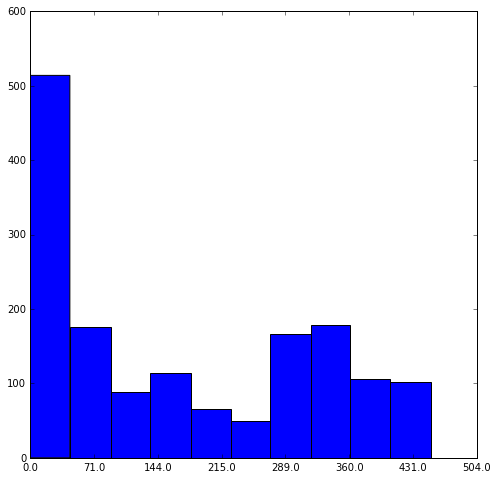

71.9634990684314


In [26]:
%matplotlib inline
# Plot out on histogram

# Choose eps value, rounded up

# Given the eps value, for each point, calculate number of neighbours.
# Plot out the number of neighbours.
# Choose min_pts
# Code
# Start timer:
time_now = time.time()

### Globals ###
file_dir = 'sleep'
# Perform clustering on files 1 to 10
# indexes = [str(x) for x in range(1,10)]
# index = '3'

file_name = ''.join([file_dir,'/','sleep-aggregate_2016-01_S019.csv'])
# print file name
# print('File name: ', file_name)

# Get dataframe containing readings from sensor reading, exclude 
df = pd.read_csv(file_name, delimiter=',', usecols=[x for x in range(1,7)],parse_dates=[1])
column_names = list(df.columns.values)
print(column_names)

############ Knee selection #############

# Calculate eps distance for each point
# X is a distance matrix.
# Set 'X1' as sleep_start timings


X1,X1_rad_series = h.get_x_from_df(df['sleep_start'])

# Set 'X2' as sleep_end timings
X2,X2_rad_series = h.get_x_from_df(df['sleep_end'])

# Flatten matrix, remove 0
X1_array = X1.flatten()

print(X1_array.size)

# Get non-zeros
X1_array_non_zeros = X1_array.nonzero()
print(X1_array_non_zeros[0].size) 

# Mask out non zeros
X1_array = X1_array[X1_array_non_zeros]

# Sanity check
print(type(X1_array))

# Generate histogram
hist, bin_edges = np.histogram(X1_array, density=False)

print(hist)
print(type(bin_edges))

bin_edges = np.around(bin_edges, 2)
# Select a eps naively...
eps = bin_edges[1]
print(eps)
# TODO count of nearest neighbours within eps range 
time_labels = np.around(h.radian_to_mins(bin_edges), 0)

# Sanity check:
y = 15 # mins
print(y == h.radian_to_mins(h.convert_to_radian(y)))

# print(time_labels)
print(bin_edges)
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)
ax1.hist(X1_array, bins=bin_edges)
ax1.set_xticklabels(time_labels)

plt.show()

print(h.radian_to_mins(0.314))

